<h1 align="center">Principal Component Analysis (PCA)</h1>
<hr>

# Links
#### [3Blue1Brown Linear Algebra Video Playlist](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
#### [Setosa EigenVectors and EigenValues](http://setosa.io/ev/eigenvectors-and-eigenvalues/)
#### [Setosa PCA](http://setosa.io/ev/principal-component-analysis/)
#### [PCA Overview](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)
#### [PCA -- Sebastian Raschka](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = pd.read_csv('../Datasets/mnist/train.csv')

In [3]:
X = ds.values[:, 1:]
labels = ds.values[:, 0]
print(X.shape)
print(labels.shape)

(42000, 784)
(42000,)


In [56]:
X_std = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-03) # Standardizing the data
print(X_std.shape)

mean = np.mean(X_std, axis=0)
print(mean)
print(mean.shape)

(42000, 784)
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.30472630e-19 -1.26882631e-18 -2.62224105e-18  5.49824736e-19
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.76707367e-19 -2.03012210e-18 -2.45306421e-18  5.92118946e-18
 -8.45884209e-18 -1.69176842e-18 -8.54343051e-18  7.44378104e-18
 -4.56777473e-18 -1.38725010e-17  9.98143367e-18  2.06818689e-17
 -2.42768768e-17 -3.55271368e-18  1.18423789e-17  3.38353684e-19
 -1.35341473e-18 -1.52259158e-18  2.07241631e-18  2.96059473e-19
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.20538500e-18  6.06921920e-18
 -2.03012210

In [5]:
cov = np.cov(X_std, rowvar=False)
print(cov.shape)

(784, 784)


In [6]:
cov[100:105,100:105]

array([[0.99998378, 0.76790152, 0.40754608, 0.1598037 , 0.04140466],
       [0.76790152, 0.99998142, 0.76059196, 0.40503524, 0.15213517],
       [0.40754608, 0.76059196, 0.99997677, 0.76374764, 0.39246381],
       [0.1598037 , 0.40503524, 0.76374764, 0.99996864, 0.74421785],
       [0.04140466, 0.15213517, 0.39246381, 0.74421785, 0.99995292]])

In [7]:
print(mean[400:410])
print(cov[510:515, 510:515])

[ 5.33329994e-17 -6.09036631e-18 -3.11708331e-17  5.33752936e-17
  6.55560262e-18 -1.08696121e-17  4.77924578e-17  6.63173220e-17
 -1.52259158e-17  1.87786294e-17]
[[0.99999858 0.76557687 0.40881585 0.14582154 0.02857417]
 [0.76557687 1.00000165 0.76155178 0.39940025 0.15539897]
 [0.40881585 0.76155178 1.00000308 0.75886348 0.41042703]
 [0.14582154 0.39940025 0.75886348 1.00000383 0.76714196]
 [0.02857417 0.15539897 0.41042703 0.76714196 1.00000435]]


In [8]:
eigen = np.linalg.eig(cov)
eigen_values, eigen_vectors = eigen
# print(eigen[0])
print(eigen_values.shape, eigen_vectors.shape)
print(eigen_values[:10], eigen_vectors[:10])

(784,) (784, 784)
[40.69537351 29.11041321 26.7824754  20.81403518 18.09952427 15.78714241
 13.82359513 12.54272145 11.0633458  10.08842803] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


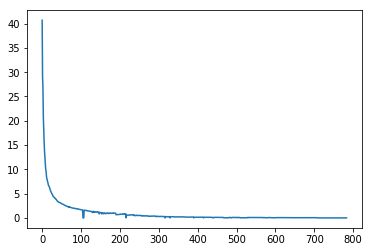

In [9]:
plt.figure()
plt.plot(eigen_values)
plt.show()

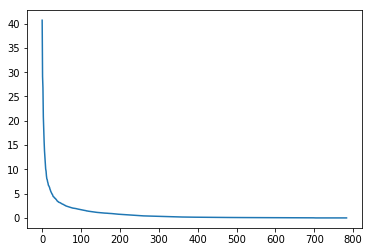

In [10]:
plt.figure()
plt.plot(sorted(eigen_values, reverse=True))
plt.show()

In [11]:
sorted(eigen_values[:20], reverse=True)

[40.695373510677456,
 29.11041320994044,
 26.782475402618076,
 20.814035180517937,
 18.099524269009173,
 15.787142408885549,
 13.82359513145338,
 12.542721449597112,
 11.063345799114279,
 10.08842802963733,
 9.635671525398456,
 8.65503342142042,
 8.040638133373756,
 7.880458529941841,
 7.435782842205358,
 7.166919444903987,
 6.73466346204415,
 6.616017964166333,
 6.4228529685400915,
 6.267534335694233]

In [12]:
eigen_vectors[:, 337]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.19820373e-03, -7.59456251e-04,  4.21440354e-03,  4.12448246e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.29995989e-03, -5.80402579e-03,  1.22796005e-02,  1.79019696e-02,
       -4.81009055e-02,  2.00339670e-02,  4.09705084e-02, -4.82954172e-02,
        1.88352018e-02,  2.54906496e-02, -3.69798506e-02,  3.08081842e-02,
        1.09513773e-02, -3.61685450e-02,  3.57900544e-02, -1.09056942e-02,
        2.04300741e-03,  7.22598753e-03, -5.30395782e-03,  5.99050451e-04,
        0.00000000e+00,  

In [13]:
eigen_zipped = zip(eigen_values,eigen_vectors)
eigen_zipped = list(eigen_zipped)
print(len(eigen_zipped))
print(eigen_zipped[100][0])

784
1.68118485242589


In [14]:
eigen_sorted = sorted(eigen_zipped, key=lambda x: x[0], reverse=True)
print(eigen_sorted[100])

print(eigen_sorted[500])

(1.68118485242589, array([ 1.76271254e-02, -2.76236887e-02,  3.17399886e-02,  8.35418436e-02,
        5.84061462e-02,  1.52045797e-02, -1.63813370e-02, -3.01418387e-02,
        2.24418078e-02, -3.45027726e-02,  3.75580141e-02, -1.16901933e-02,
        7.20604406e-03,  6.86303039e-02,  8.67587970e-03,  2.89195166e-03,
        8.48396489e-03, -2.29183657e-02,  2.32509221e-02, -2.12835321e-02,
        3.57185847e-02, -6.46035430e-02,  7.75891077e-02,  2.45290868e-03,
        2.46684698e-02, -7.88643185e-02,  7.05217399e-02,  3.66689121e-03,
        5.68691118e-03, -3.97498649e-02,  2.32336206e-02,  4.87316496e-02,
        3.12851762e-02,  8.53411873e-03, -3.63625985e-02, -6.09042071e-03,
        2.89668779e-02,  2.23267902e-02,  5.97820873e-02,  3.95238311e-03,
        5.56828056e-02,  3.73967049e-02, -3.95177861e-02,  6.91345468e-02,
        1.28412381e-02,  9.34682576e-02, -7.44492465e-02,  7.27464782e-02,
        1.58493190e-02, -4.92344633e-02,  3.86718405e-03,  1.74886898e-02,
      

In [15]:
eigen_values, eigen_vectors = list(), list()
for lam, vec in eigen_sorted:
    eigen_values.append(lam)
    eigen_vectors.append(vec)
eigen_values = np.array(eigen_values)
eigen_vectors = np.array(eigen_vectors)

print(eigen_values.shape, eigen_vectors.shape)
print(eigen_values[100])
print(eigen_vectors[100])

(784,) (784, 784)
1.68118485242589
[ 1.76271254e-02 -2.76236887e-02  3.17399886e-02  8.35418436e-02
  5.84061462e-02  1.52045797e-02 -1.63813370e-02 -3.01418387e-02
  2.24418078e-02 -3.45027726e-02  3.75580141e-02 -1.16901933e-02
  7.20604406e-03  6.86303039e-02  8.67587970e-03  2.89195166e-03
  8.48396489e-03 -2.29183657e-02  2.32509221e-02 -2.12835321e-02
  3.57185847e-02 -6.46035430e-02  7.75891077e-02  2.45290868e-03
  2.46684698e-02 -7.88643185e-02  7.05217399e-02  3.66689121e-03
  5.68691118e-03 -3.97498649e-02  2.32336206e-02  4.87316496e-02
  3.12851762e-02  8.53411873e-03 -3.63625985e-02 -6.09042071e-03
  2.89668779e-02  2.23267902e-02  5.97820873e-02  3.95238311e-03
  5.56828056e-02  3.73967049e-02 -3.95177861e-02  6.91345468e-02
  1.28412381e-02  9.34682576e-02 -7.44492465e-02  7.27464782e-02
  1.58493190e-02 -4.92344633e-02  3.86718405e-03  1.74886898e-02
  2.06986321e-02 -2.22219675e-02  5.22140574e-02 -7.40177025e-02
 -1.68422704e-04 -1.77741617e-02 -1.49948035e-02 -2.803

In [16]:
eigen_values[:10]

array([40.69537351, 29.11041321, 26.7824754 , 20.81403518, 18.09952427,
       15.78714241, 13.82359513, 12.54272145, 11.0633458 , 10.08842803])

In [17]:
eigen_cumulative = np.cumsum(eigen_values) / eigen_values.sum()
print(eigen_cumulative.shape)
print(eigen_cumulative[:10])

(784,)
[0.05752403 0.0986724  0.13653017 0.16595138 0.19153555 0.21385111
 0.23339115 0.25112063 0.26675897 0.28101924]


In [18]:
eigen_cumulative[400]

0.9718373781481066

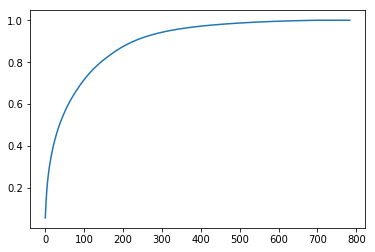

In [19]:
plt.figure()
plt.plot(eigen_cumulative)
plt.show()

In [20]:
def get_k(info=0.95):
    k = 0
    for i in range(eigen_cumulative.shape[0]):
        k = i
        if eigen_cumulative[i] >= info:
            break
    return k

In [21]:
get_k(0.95)

319

In [22]:
def explain_variances(at=None):
    if at is None:
        at = int(eigen_cumulative.shape[0] / 2)
        
    explained = eigen_cumulative[at]
    loss = (1 - explained)
    
    print("--- At {} ---".format(at))
    print("Variances Explained: ", explained * 100, '%')
    print("Loss: ", loss * 100, '%')
    return explained, loss

In [23]:
explain_variances(319)

--- At 319 ---
Variances Explained:  95.00867038583043 %
Loss:  4.991329614169571 %


(0.9500867038583043, 0.04991329614169571)

--- At 0 ---
Variances Explained:  5.752403049730629 %
Loss:  94.24759695026937 %
--- At 1 ---
Variances Explained:  9.867240076201075 %
Loss:  90.13275992379891 %
--- At 2 ---
Variances Explained:  13.653016686530828 %
Loss:  86.34698331346917 %
--- At 3 ---
Variances Explained:  16.59513784480445 %
Loss:  83.40486215519554 %
--- At 4 ---
Variances Explained:  19.153555414713335 %
Loss:  80.84644458528668 %
--- At 5 ---
Variances Explained:  21.38511144443199 %
Loss:  78.61488855556802 %
--- At 6 ---
Variances Explained:  23.339114662305146 %
Loss:  76.66088533769485 %
--- At 7 ---
Variances Explained:  25.112062859958467 %
Loss:  74.88793714004154 %
--- At 8 ---
Variances Explained:  26.67589723779878 %
Loss:  73.32410276220122 %
--- At 9 ---
Variances Explained:  28.10192430570239 %
Loss:  71.8980756942976 %
--- At 10 ---
Variances Explained:  29.463952995631033 %
Loss:  70.53604700436897 %
--- At 11 ---
Variances Explained:  30.687365790597426 %
Loss:  69.31263420940257 %
--- At 12

Variances Explained:  95.35232383521864 %
Loss:  4.647676164781355 %
--- At 330 ---
Variances Explained:  95.38513546103941 %
Loss:  4.614864538960594 %
--- At 331 ---
Variances Explained:  95.41785558719377 %
Loss:  4.582144412806233 %
--- At 332 ---
Variances Explained:  95.45034026893781 %
Loss:  4.549659731062194 %
--- At 333 ---
Variances Explained:  95.48261633065377 %
Loss:  4.517383669346231 %
--- At 334 ---
Variances Explained:  95.5147378421531 %
Loss:  4.485262157846903 %
--- At 335 ---
Variances Explained:  95.54660281275204 %
Loss:  4.453397187247965 %
--- At 336 ---
Variances Explained:  95.57821761120861 %
Loss:  4.421782388791384 %
--- At 337 ---
Variances Explained:  95.60962047791605 %
Loss:  4.390379522083954 %
--- At 338 ---
Variances Explained:  95.64061486321056 %
Loss:  4.35938513678944 %
--- At 339 ---
Variances Explained:  95.67146247195441 %
Loss:  4.328537528045584 %
--- At 340 ---
Variances Explained:  95.70208938788353 %
Loss:  4.297910612116462 %
--- At 34

Variances Explained:  99.95959648456333 %
Loss:  0.04040351543665999 %
--- At 687 ---
Variances Explained:  99.96295816145772 %
Loss:  0.03704183854228438 %
--- At 688 ---
Variances Explained:  99.96627443243766 %
Loss:  0.033725567562348235 %
--- At 689 ---
Variances Explained:  99.96957435891386 %
Loss:  0.03042564108614032 %
--- At 690 ---
Variances Explained:  99.97284803083224 %
Loss:  0.027151969167760193 %
--- At 691 ---
Variances Explained:  99.97607186032651 %
Loss:  0.02392813967349028 %
--- At 692 ---
Variances Explained:  99.97918503013629 %
Loss:  0.020814969863702792 %
--- At 693 ---
Variances Explained:  99.98221085394289 %
Loss:  0.017789146057112237 %
--- At 694 ---
Variances Explained:  99.98520197904315 %
Loss:  0.01479802095685212 %
--- At 695 ---
Variances Explained:  99.98813891572608 %
Loss:  0.01186108427391197 %
--- At 696 ---
Variances Explained:  99.99098580083164 %
Loss:  0.009014199168366765 %
--- At 697 ---
Variances Explained:  99.99360776609697 %
Loss:  

Variances Explained:  92.19983245422435 %
Loss:  7.800167545775649 %
--- At 260 ---
Variances Explained:  92.25938411995178 %
Loss:  7.740615880048218 %
--- At 261 ---
Variances Explained:  92.31826083365621 %
Loss:  7.681739166343792 %
--- At 262 ---
Variances Explained:  92.37677583425818 %
Loss:  7.623224165741815 %
--- At 263 ---
Variances Explained:  92.43512303568596 %
Loss:  7.564876964314038 %
--- At 264 ---
Variances Explained:  92.4926493154207 %
Loss:  7.507350684579295 %
--- At 265 ---
Variances Explained:  92.5499273258972 %
Loss:  7.450072674102792 %
--- At 266 ---
Variances Explained:  92.60689529051184 %
Loss:  7.393104709488152 %
--- At 267 ---
Variances Explained:  92.66353522173863 %
Loss:  7.336464778261376 %
--- At 268 ---
Variances Explained:  92.71980548375203 %
Loss:  7.280194516247973 %
--- At 269 ---
Variances Explained:  92.77503238381519 %
Loss:  7.224967616184818 %
--- At 270 ---
Variances Explained:  92.82978698852666 %
Loss:  7.1702130114733365 %
--- At 2

Variances Explained:  99.63571619287511 %
Loss:  0.3642838071248877 %
--- At 617 ---
Variances Explained:  99.64153258713424 %
Loss:  0.35846741286575945 %
--- At 618 ---
Variances Explained:  99.64729411820481 %
Loss:  0.35270588179519 %
--- At 619 ---
Variances Explained:  99.65300868819811 %
Loss:  0.3469913118018919 %
--- At 620 ---
Variances Explained:  99.65869703084536 %
Loss:  0.3413029691546332 %
--- At 621 ---
Variances Explained:  99.66437694532898 %
Loss:  0.33562305467101927 %
--- At 622 ---
Variances Explained:  99.67003343047234 %
Loss:  0.329966569527651 %
--- At 623 ---
Variances Explained:  99.67565365010314 %
Loss:  0.3243463498968535 %
--- At 624 ---
Variances Explained:  99.68124496192911 %
Loss:  0.3187550380708948 %
--- At 625 ---
Variances Explained:  99.68681978508883 %
Loss:  0.31318021491116843 %
--- At 626 ---
Variances Explained:  99.69236754084228 %
Loss:  0.307632459157714 %
--- At 627 ---
Variances Explained:  99.69784400414225 %
Loss:  0.302155995857744

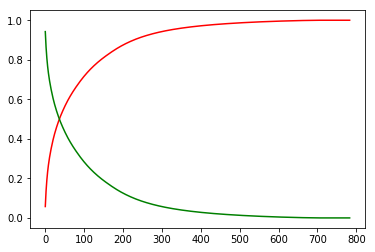

In [24]:
explained =  [explain_variances(i)[0] for i in range(784)]
loss = [explain_variances(i)[1] for i in range(784)]
plt.figure()
plt.plot(explained, 'r')
plt.plot(loss, 'g')
plt.show()

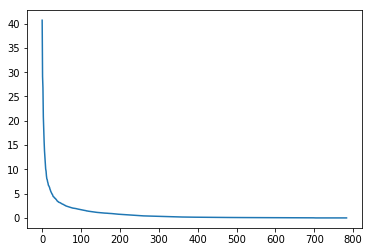

In [25]:
plt.figure()
plt.plot(eigen_values[:])
plt.show()

In [26]:
# Select top k dimensions

k = get_k(info=0.955)
dim = eigen_values.shape[0]
print(k, dim)

334 784


In [27]:
top_k_components = []

for i in range(k):
    top_k_components.append(eigen_vectors[:, i].reshape(dim, 1))
    
mat_W = np.hstack(top_k_components)

In [28]:
eigen_vectors[:,0].shape

(784,)

In [29]:
print(mat_W.shape)
print(X_std.shape)

(784, 334)
(42000, 784)


In [30]:
y = X_std.dot(mat_W)
print(y.shape)

(42000, 334)


In [31]:
y[0]

array([-1.35706110e+00, -6.02886908e-01,  5.04412097e-02, -8.02420886e-01,
       -1.57939294e+00,  1.06791245e+00,  1.98602841e-01,  2.18004395e+00,
        1.18969251e+00,  1.81603922e+00,  1.60135425e+00, -4.26268635e-01,
        9.64175795e-01, -1.81348701e-01, -2.01289685e+00, -9.48664126e-01,
       -2.18057418e+00, -5.62657653e-01, -1.31301215e+00,  2.66908075e-01,
       -1.84770205e-01,  4.33242962e-01, -2.55539499e-01, -6.44218763e-01,
       -3.29938012e-01,  1.30348752e+00,  4.87074217e-01, -8.86019034e-01,
        8.12845088e-01, -1.59609293e-01, -5.44887302e-01,  8.81583282e-01,
       -1.17082827e+00,  9.00040907e-02,  6.30719336e-01,  1.03829844e+00,
        4.90267582e-01,  9.35969731e-01,  5.17602595e-03, -9.42518775e-01,
        7.00410131e-01, -2.71809934e-01, -1.16802820e-03, -8.71605658e-02,
        4.31009976e-01, -1.10442785e+00, -4.58829329e-01,  5.64952814e-01,
       -2.29785014e-01, -1.74276490e-02, -4.71026535e-01, -1.21637095e+00,
        4.52902609e-01,  

# SKLearn

In [32]:
from sklearn.decomposition import PCA
import datetime

In [33]:
explain_variances(2)

--- At 2 ---
Variances Explained:  13.653016686530828 %
Loss:  86.34698331346917 %


(0.13653016686530828, 0.8634698331346917)

In [50]:
t0 = datetime.datetime.now()
pca = PCA(n_components=2)
X_sk = pca.fit_transform(X_std)
print("Time Taken: ", datetime.datetime.now() - t0)

Time Taken:  0:00:01.197539


In [51]:
X_sk.shape

(42000, 2)

In [52]:
var = pca.explained_variance_ratio_
print(var)
cumulative  = np.cumsum(var) / np.sum(var)
print(cumulative)

[0.05752403 0.04114837]
[0.58297994 1.        ]


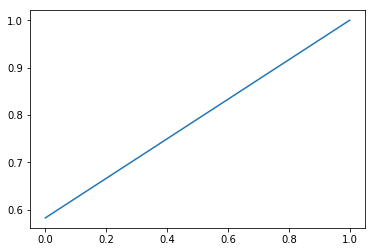

In [53]:
plt.figure()
plt.plot(cumulative)
plt.show()

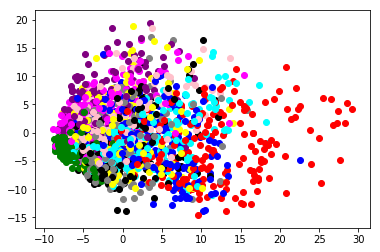

In [54]:
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'black', 'cyan', 'purple', 'gray', 'magenta']

plt.figure()
for i in range(2000):
    plt.scatter(X_sk[i,0], X_sk[i,1], color=colors[labels[i]])
plt.show()

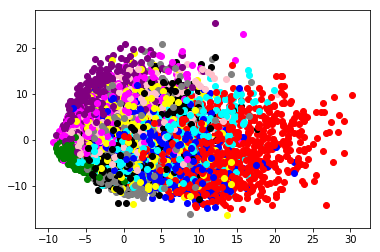

In [55]:
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'black', 'cyan', 'purple', 'gray', 'magenta']

plt.figure()
for i in range(10000):
    plt.scatter(X_sk[i,0], X_sk[i,1], color=colors[labels[i]])
plt.show()